# Central London Data Science Project Nights
### Optimising training data for urban wind predictions
The focus of this meetup is in finding out different ways in which training data can be structure in order to improve a models accuracy.


### The data
The data supplied is sythetically generated urban wind data from 3 streets. The csv is structure as follows:

street 1 wind speed (m/s), street 1 wind direction (degrees), street 2 wind speed (m/s), street 2 wind direction (degrees), street 3 wind speed (m/s), street 3 wind direction (degrees)

The predicted value is the wind direction of the 3rd street

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

### Load csv data
street1 wind speed, street1 wind direction,street2 wind speed, street2 wind direction,street3 wind speed, street3 wind direction,

In [2]:
f = open("wind.csv")
data = np.loadtxt(f,delimiter=',')
# show first row of data
data[:1],data.shape

(array([[  38.57 ,  126.087,   47.134,   46.155,   19.41 ,  115.275]]),
 (2000, 6))

# Transform the input data function (the fun bit)

In [3]:
def transformInputData(inputData):
    
    # this is where you put explore different way the data can be structed
    
    # feel free to write one for the output data to if you want 
    # (dont forget to reverse what you do for the output when submiting to scilan)
    
    return inputData

### Split data into training and test data

In [4]:
# use first 4 columns as the input data to a our model
x_data = transformInputData(data[:,:4])

# use first 1500 rows as training input data
x_train = x_data[:1500]

# use the remaining 500 rows as test input data
x_test = x_data[1500:]

# show first 3 rows of training input data
x_train[:3]

array([[  38.57 ,  126.087,   47.134,   46.155],
       [  26.019,  343.995,   31.961,   54.67 ],
       [  38.568,  129.103,   31.58 ,   67.669]])

In [5]:
# use 5th column as the ouput data to a our model
y_data = data[:,5]

# use first 1500 rows as training ouput data
y_train = y_data[:1500]

# use the remaining 500 rows as test output data
y_test = y_data[1500:]

# show first 3 rows of training output data
y_train[:3]

array([ 115.275,  332.388,  143.187])

### Train model

In [6]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"% np.mean((regr.predict(x_test) - y_test) ** 2))

Coefficients: 
 [ 0.22249504  0.76446031 -0.17549725 -0.08686491]
Mean squared error: 5106.20


### Plot predictions

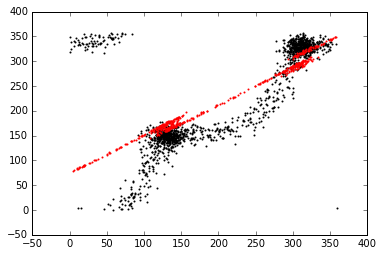

In [7]:
plt.scatter(x_train[:,1], y_train,  color='black', s=1)
plt.scatter(x_test[:,1], regr.predict(x_test),  color='red', s=1)
plt.show()

# Scilan data entry

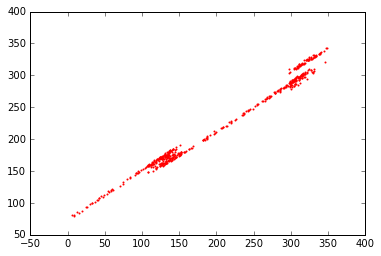

In [8]:
f = open("scilan-test-inputs.csv")
scilan_data = np.loadtxt(f,delimiter=',')

scilan_x = transformInputData(scilan_data)

scilan_pred = regr.predict(scilan_x)

plt.scatter(scilan_data[:,1], scilan_pred,  color='red', s=1)

## Copy the ouput of the following code into the 'Predicted Output' field of the submit attempt page (excluding the quotes) 

In [9]:
','.join(map(str, scilan_pred)) 

'174.521361949,285.623969809,202.543607336,302.509811342,171.750166845,120.45835121,267.583435489,188.787760849,283.216018786,163.09037336,159.514343163,342.524240513,161.936271984,293.963110167,200.580487682,298.619385931,219.965532649,304.864365013,179.519658939,324.86356375,334.733529637,260.062549061,330.89949347,217.045833906,296.182552038,171.195558576,315.929135847,99.8197973245,80.7641751447,169.28857637,104.583359877,107.161279756,170.705680212,169.595724714,286.059756193,161.371810467,165.144374256,174.415871552,167.968951045,107.391458818,166.367165691,286.098180583,174.622441557,146.322604735,293.689054512,295.263816919,171.578225073,158.941292896,167.573637115,157.836532966,260.242528932,318.32311178,247.064962673,334.024488344,289.522453057,323.416670993,232.315196332,175.983900435,136.804013472,240.851821033,160.548591909,165.081781269,163.306007914,171.008276938,318.329730946,288.19173079,171.647555701,280.775239939,183.231062756,118.471620938,174.138863623,296.31750117